#**Proyecto Final:**

## **Parte 1: Preprocesamiento y analisis de Datos**


### **Mineria de Datos**

Se utilizan tecnicas de Webscraping y uso de APIS para obtener datos sobre los precios de mercado de las acciones de empresas que componene al indice busatil Dow Jones.

In [231]:
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd

#### **Webscraping**

In [232]:
web="https://www.dogsofthedow.com/dowcomp.htm"
web_symbols=rq.get(web)
web_symbols_sopa=BeautifulSoup(web_symbols.text,"lxml")

In [233]:
simbolos=[symbol.text for symbol in web_symbols_sopa.find_all("td",attrs={"class":"column-1"})]
nombres=[nombre.text for nombre in web_symbols_sopa.find_all("td",attrs={"class":"column-2"})]
for i in range(3):
  simbolos.remove("")
  nombres.remove("")

In [234]:
nombres_df=pd.DataFrame(simbolos,nombres)
nombres_df

,0
American Express,AXP
Amgen,AMGN
Apple,AAPL
Boeing,BA
Caterpillar,CAT
Chevron,CVX
Cisco,CSCO
Coca-Cola,KO
Disney,DIS
Dow,DOW


#### **Api finaciera Finnhub**

In [235]:
!pip install finnhub-python

In [236]:
import finnhub
import numpy as np
import pandas as pd 
import datetime
finnhub_client = finnhub.Client(api_key="c3d1rviad3i868doota0") #Api key

datos=pd.DataFrame()    
fecha_inicio=" 1609477200" # 1 enero 2021     #"1622527200"    #  
fecha_final=" 1626238800"   #14 de julio 2021

periodo="D"    #['M','5M','15M','30M','H','D','W','M']
datos[f"Fecha"]=(finnhub_client.stock_candles(simbolos[0], periodo, int(fecha_inicio),int(fecha_final) ))["t"]
for i in simbolos:
  datos[f"{i}"]=(finnhub_client.stock_candles(i, periodo, int(fecha_inicio),int(fecha_final) ))["c"]


In [237]:
datos.head(2)

,Fecha,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DOW,GS,HD,HON,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,VZ,V,WBA,WMT
0,1609718400,118.04,226.66,129.41,202.72,182.15,84.71,43.96,52.76,177.68,54.04,265.00,263.92,207.95,49.67,156.50,125.87,210.22,80.96,217.69,140.10,137.82,220.31,135.65,58.85,217.76,41.40,146.53
1,1609804800,118.67,227.76,131.01,211.63,183.64,87.00,43.98,52.18,178.44,55.80,270.93,266.05,208.46,50.61,158.34,125.65,211.48,81.10,217.90,141.23,138.70,221.52,134.53,58.58,214.51,41.16,145.75


#### **Transformacion y manejo de Datos**

* **Tranformacion Fechas**

In [238]:
# Transformacion de los formatos de Fecha 
datos.insert(0,"Fecha_",[datetime.datetime.fromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S') for i in datos["Fecha"]])  
datos.drop(columns=["Fecha"],inplace=True)
datos.insert(0,"Fecha",["/".join(reversed(i.split(" ")[0].split("-"))) for i in datos["Fecha_"] ])
datos.drop(columns=["Fecha_"],inplace=True)

In [239]:
datos.head()

,Fecha,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DOW,GS,HD,HON,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,VZ,V,WBA,WMT
0,04/01/2021,118.04,226.66,129.41,202.72,182.15,84.71,43.96,52.76,177.68,54.04,265.00,263.92,207.95,49.67,156.50,125.87,210.22,80.96,217.69,140.10,137.82,220.31,135.65,58.85,217.76,41.40,146.53
1,05/01/2021,118.67,227.76,131.01,211.63,183.64,87.00,43.98,52.18,178.44,55.80,270.93,266.05,208.46,50.61,158.34,125.65,211.48,81.10,217.90,141.23,138.70,221.52,134.53,58.58,214.51,41.16,145.75
2,06/01/2021,123.06,233.25,126.60,211.03,193.86,89.80,44.40,50.52,179.12,58.43,285.55,267.57,212.26,51.10,159.83,131.55,211.00,82.38,212.25,142.35,140.16,216.15,139.10,59.29,212.62,43.03,146.66
3,07/01/2021,121.66,234.02,130.92,212.71,194.23,90.22,44.96,49.96,178.58,58.51,291.65,266.26,212.61,52.19,160.37,135.87,211.98,84.02,218.29,144.95,138.85,217.98,139.07,58.53,213.81,45.26,146.65
4,08/01/2021,121.78,238.49,132.05,209.90,194.26,91.08,45.06,51.08,178.69,58.21,290.08,269.09,210.03,51.65,160.04,136.02,215.87,83.03,219.62,146.35,138.79,222.04,139.65,57.80,215.45,45.21,146.63


* **Analisis Crecimiento de los datos**

In [240]:
# se crea la funcion Crecimiento para editar el DataFrame

def crecimiento(data,columna):
  """Esta Función calcula el crecimiento de los precios entre dias 
  para las diferentes empresas"""
  global lista_resultado
  lista_resultado=[(data[columna].iloc[i+1]-data[columna].iloc[i])/data[columna].iloc[i] for\
                   i in range(len(data[columna])-1)]

In [241]:
datos_crecimiento=pd.DataFrame()
for columna in list(datos.columns):
  if columna=="Fecha":
    None
  else:
    for i in range(len(datos)):
      crecimiento(datos,columna)
      datos_crecimiento[columna]=lista_resultado
datos_crecimiento.insert(0,"Fecha",datos["Fecha"])

  

In [242]:
datos_crecimiento.head()

,Fecha,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DOW,GS,HD,HON,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,VZ,V,WBA,WMT
0,04/01/2021,0.005337,0.004853,0.012364,0.043952,0.008180,0.027033,0.000455,-0.010993,0.004277,0.032568,0.022377,0.008071,0.002453,0.018925,0.011757,-0.001748,0.005994,0.001729,0.000965,0.008066,0.006385,0.005492,-0.008257,-0.004588,-0.014925,-0.005797,-0.005323
1,05/01/2021,0.036993,0.024104,-0.033662,-0.002835,0.055652,0.032184,0.009550,-0.031813,0.003811,0.047133,0.053962,0.005713,0.018229,0.009682,0.009410,0.046956,-0.002270,0.015783,-0.025929,0.007930,0.010526,-0.024242,0.033970,0.012120,-0.008811,0.045432,0.006244
2,06/01/2021,-0.011377,0.003301,0.034123,0.007961,0.001909,0.004677,0.012613,-0.011085,-0.003015,0.001369,0.021362,-0.004896,0.001649,0.021331,0.003379,0.032839,0.004645,0.019908,0.028457,0.018265,-0.009346,0.008466,-0.000216,-0.012818,0.005597,0.051824,-0.000068
3,07/01/2021,0.000986,0.019101,0.008631,-0.013210,0.000154,0.009532,0.002224,0.022418,0.000616,-0.005127,-0.005383,0.010629,-0.012135,-0.010347,-0.002058,0.001104,0.018351,-0.011783,0.006093,0.009659,-0.000432,0.018626,0.004171,-0.012472,0.007670,-0.001105,-0.000136
4,08/01/2021,-0.005912,-0.003858,-0.023249,-0.014817,-0.002059,0.005709,0.006658,-0.017228,0.002239,0.011166,0.012927,0.007953,-0.007951,-0.002130,-0.004186,0.014924,-0.007597,0.023726,-0.009699,0.004783,-0.006773,-0.017069,-0.015897,-0.005882,-0.011882,0.055076,0.004501


In [243]:
datos_crecimiento.set_index("Fecha",inplace=True)


In [244]:
datos_crecimiento.head()

,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DOW,GS,HD,HON,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,VZ,V,WBA,WMT
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
04/01/2021,0.005337,0.004853,0.012364,0.043952,0.008180,0.027033,0.000455,-0.010993,0.004277,0.032568,0.022377,0.008071,0.002453,0.018925,0.011757,-0.001748,0.005994,0.001729,0.000965,0.008066,0.006385,0.005492,-0.008257,-0.004588,-0.014925,-0.005797,-0.005323
05/01/2021,0.036993,0.024104,-0.033662,-0.002835,0.055652,0.032184,0.009550,-0.031813,0.003811,0.047133,0.053962,0.005713,0.018229,0.009682,0.009410,0.046956,-0.002270,0.015783,-0.025929,0.007930,0.010526,-0.024242,0.033970,0.012120,-0.008811,0.045432,0.006244
06/01/2021,-0.011377,0.003301,0.034123,0.007961,0.001909,0.004677,0.012613,-0.011085,-0.003015,0.001369,0.021362,-0.004896,0.001649,0.021331,0.003379,0.032839,0.004645,0.019908,0.028457,0.018265,-0.009346,0.008466,-0.000216,-0.012818,0.005597,0.051824,-0.000068
07/01/2021,0.000986,0.019101,0.008631,-0.013210,0.000154,0.009532,0.002224,0.022418,0.000616,-0.005127,-0.005383,0.010629,-0.012135,-0.010347,-0.002058,0.001104,0.018351,-0.011783,0.006093,0.009659,-0.000432,0.018626,0.004171,-0.012472,0.007670,-0.001105,-0.000136
08/01/2021,-0.005912,-0.003858,-0.023249,-0.014817,-0.002059,0.005709,0.006658,-0.017228,0.002239,0.011166,0.012927,0.007953,-0.007951,-0.002130,-0.004186,0.014924,-0.007597,0.023726,-0.009699,0.004783,-0.006773,-0.017069,-0.015897,-0.005882,-0.011882,0.055076,0.004501


* **Estadistica Datos**

In [245]:
datos_crecimiento.describe()

,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DOW,GS,HD,HON,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,VZ,V,WBA,WMT
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.003015,0.000662,0.001222,0.001029,0.001272,0.001550,0.001640,0.000532,0.000366,0.001273,0.002755,0.001524,0.000764,0.001224,0.000692,0.001681,0.000960,-0.000236,0.002069,0.001272,0.000056,0.000859,0.001089,-0.000284,0.001022,0.001109,-0.000197
std,0.016565,0.012778,0.017131,0.022859,0.016517,0.017040,0.011750,0.009585,0.015938,0.019696,0.016444,0.012847,0.012196,0.022158,0.009634,0.014020,0.009788,0.012878,0.013676,0.020114,0.009779,0.016426,0.014305,0.009936,0.014006,0.018371,0.011395
min,-0.041271,-0.072198,-0.041674,-0.056205,-0.038014,-0.042912,-0.025979,-0.031813,-0.038511,-0.060012,-0.035048,-0.041311,-0.039798,-0.092859,-0.035647,-0.028860,-0.038908,-0.067900,-0.029363,-0.041186,-0.035390,-0.063095,-0.048014,-0.031667,-0.062358,-0.074130,-0.064810
25%,-0.009487,-0.005623,-0.008759,-0.013214,-0.008171,-0.008298,-0.006123,-0.004524,-0.007629,-0.010864,-0.009443,-0.005772,-0.006493,-0.010612,-0.004176,-0.007657,-0.004069,-0.005678,-0.005680,-0.009418,-0.005846,-0.008034,-0.008036,-0.004661,-0.005186,-0.008729,-0.005471
50%,0.004829,0.000838,0.001359,-0.002558,0.000759,0.003111,0.000606,0.000774,-0.000086,0.000234,0.002347,0.002553,0.000845,-0.000342,0.000427,0.001139,0.000409,-0.000126,0.001299,-0.000155,0.000369,0.000334,0.001793,0.000000,0.000468,-0.001008,-0.000102
75%,0.011305,0.007777,0.012866,0.014022,0.009142,0.011778,0.007849,0.006939,0.006770,0.012282,0.013154,0.009615,0.007716,0.013580,0.005846,0.011536,0.006810,0.007342,0.012233,0.009664,0.006211,0.011222,0.010181,0.004425,0.008875,0.009269,0.006077
max,0.042773,0.026843,0.053851,0.081180,0.055652,0.043062,0.040784,0.022537,0.062740,0.049166,0.053962,0.027018,0.032384,0.069684,0.027112,0.046956,0.038241,0.028363,0.036500,0.155314,0.031355,0.054333,0.038007,0.052447,0.039184,0.055076,0.028093


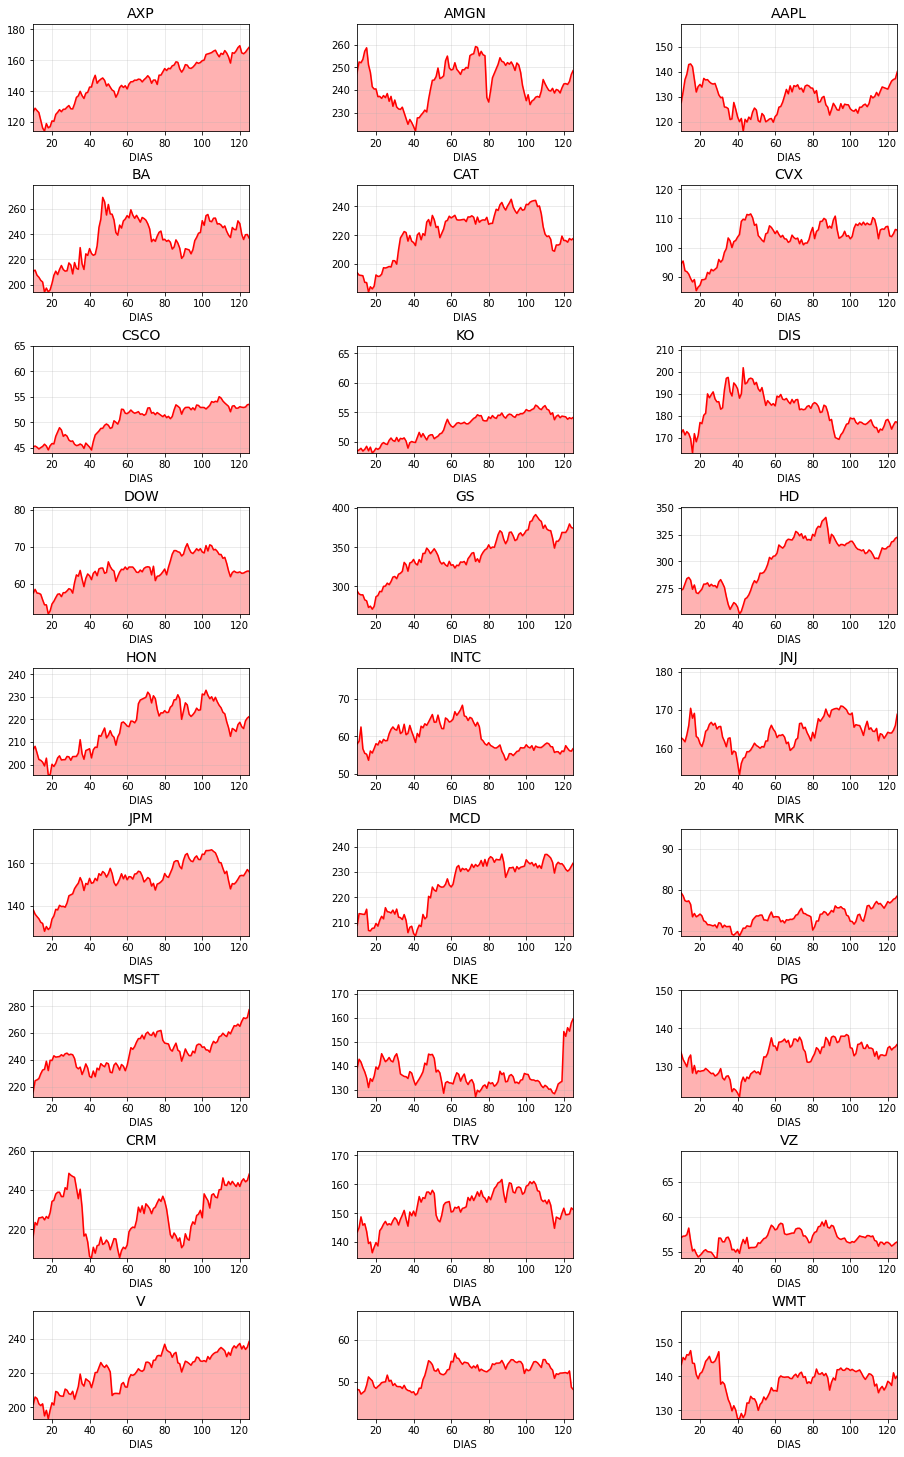

In [246]:
a=np.array(simbolos)   # se modifico la lista para  hacer una matrix 9*3 con los nombres de los simmbolos 
a=a.reshape(9,3)     
import matplotlib.pyplot as plt
fig,ax=plt.subplots(9,3,figsize=(15,25))
plt.subplots_adjust(left=0, right=0.8,top=0.9, hspace=0.5,wspace=0.5)
X=datos.index
for i in range(9):
  for j in range(3):
    ax[i,j].plot(X,datos[a[i,j]],color="red")
    ax[i,j].set_title(a[i,j],fontsize=14)
    ax[i,j].fill_between(X,0,datos[a[i,j]],where=0<datos[a[i,j]].iloc[X],alpha=0.3,color="red")
    ax[i,j].set_ylim(datos[a[i,j]].min(),datos[a[i,j]].max()+10)
    ax[i,j].set_xlim(10,125)
    ax[i,j].set_xlabel("DIAS")
    ax[i,j].grid(alpha=0.3)


* **Exportando Datos para uso en R** 

In [247]:
data_=datos_crecimiento.transpose()

In [248]:
data_.describe()

Fecha,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,25/01/2021,26/01/2021,27/01/2021,28/01/2021,29/01/2021,01/02/2021,02/02/2021,03/02/2021,04/02/2021,05/02/2021,08/02/2021,09/02/2021,10/02/2021,11/02/2021,12/02/2021,16/02/2021,17/02/2021,18/02/2021,19/02/2021,22/02/2021,23/02/2021,24/02/2021,25/02/2021,26/02/2021,01/03/2021,02/03/2021,...,17/05/2021,18/05/2021,19/05/2021,20/05/2021,21/05/2021,24/05/2021,25/05/2021,26/05/2021,27/05/2021,28/05/2021,01/06/2021,02/06/2021,03/06/2021,04/06/2021,07/06/2021,08/06/2021,09/06/2021,10/06/2021,11/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,21/06/2021,22/06/2021,23/06/2021,24/06/2021,25/06/2021,28/06/2021,29/06/2021,30/06/2021,01/07/2021,02/07/2021,06/07/2021,07/07/2021,08/07/2021,09/07/2021,12/07/2021,13/07/2021
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.006652,0.013179,0.008550,0.002436,-0.000242,0.002052,0.002391,-0.000764,-0.007963,0.003011,0.008795,-0.001791,-0.004239,-0.001310,-0.003201,-0.021278,0.011520,-0.020295,0.007948,0.015913,0.001597,0.013721,0.005235,0.007495,-0.002133,0.001592,0.001268,0.002132,0.001940,0.003910,-0.005377,0.002103,0.001072,0.000770,0.013077,-0.018472,-0.016303,0.020248,-0.004934,-0.004450,...,-0.008659,-0.004922,0.006212,0.002164,0.006686,-0.003633,-0.000671,0.002993,0.001304,0.001890,0.001814,0.000461,0.005787,-0.003453,-0.001653,-0.004250,0.003122,0.001006,-0.003109,-0.002163,-0.007773,-0.006106,-0.016909,0.016191,0.001948,-0.001712,0.008484,0.007982,-0.003921,-0.000346,0.005370,0.001772,0.004994,-0.006624,0.002555,-0.007823,0.013228,0.003109,-0.002745,0.002007
std,0.013245,0.025349,0.015618,0.010129,0.015703,0.020867,0.016219,0.016483,0.015534,0.014103,0.014092,0.019463,0.020499,0.014987,0.015995,0.018008,0.018545,0.012322,0.012468,0.015005,0.010373,0.013415,0.009469,0.013206,0.008250,0.011347,0.011357,0.007914,0.014985,0.014594,0.015786,0.020956,0.022174,0.012252,0.021138,0.014726,0.015502,0.015214,0.009447,0.015496,...,0.010855,0.010629,0.006606,0.009059,0.008293,0.008785,0.010064,0.015041,0.011756,0.014824,0.008427,0.011651,0.008364,0.007663,0.005687,0.010005,0.015638,0.007933,0.010362,0.008270,0.008633,0.014655,0.010461,0.009339,0.006530,0.006018,0.007945,0.030228,0.013303,0.009030,0.008643,0.016921,0.008657,0.009786,0.007878,0.009774,0.011181,0.010503,0.011389,0.011055
min,-0.014925,-0.033662,-0.012818,-0.013210,-0.023249,-0.067900,-0.016547,-0.035777,-0.039229,-0.022624,-0.014996,-0.035332,-0.092859,-0.039559,-0.041271,-0.039741,-0.034985,-0.045605,-0.028259,-0.008973,-0.014179,-0.016683,-0.012866,-0.011715,-0.013078,-0.025979,-0.028870,-0.016971,-0.024613,-0.017644,-0.064810,-0.022068,-0.037671,-0.031213,-0.027204,-0.056205,-0.063095,-0.003306,-0.026081,-0.034993,...,-0.041783,-0.028066,-0.007937,-0.014767,-0.012988,-0.023209,-0.040229,-0.022734,-0.014679,-0.021979,-0.020736,-0.021573,-0.006211,-0.017676,-0.011582,-0.022943,-0.038014,-0.022283,-0.016969,-0.015168,-0.024249,-0.035504,-0.037732,0.001827,-0.007296,-0.010918,-0.002169,-0.013814,-0.033900,-0.017503,-0.010749,-0.074130,-0.012723,-0.024878,-0.018464,-0.024115,-0.003011,-0.009490,-0.042343,-0.018859
25%

In [249]:
data_.head()

Fecha,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,25/01/2021,26/01/2021,27/01/2021,28/01/2021,29/01/2021,01/02/2021,02/02/2021,03/02/2021,04/02/2021,05/02/2021,08/02/2021,09/02/2021,10/02/2021,11/02/2021,12/02/2021,16/02/2021,17/02/2021,18/02/2021,19/02/2021,22/02/2021,23/02/2021,24/02/2021,25/02/2021,26/02/2021,01/03/2021,02/03/2021,...,17/05/2021,18/05/2021,19/05/2021,20/05/2021,21/05/2021,24/05/2021,25/05/2021,26/05/2021,27/05/2021,28/05/2021,01/06/2021,02/06/2021,03/06/2021,04/06/2021,07/06/2021,08/06/2021,09/06/2021,10/06/2021,11/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,21/06/2021,22/06/2021,23/06/2021,24/06/2021,25/06/2021,28/06/2021,29/06/2021,30/06/2021,01/07/2021,02/07/2021,06/07/2021,07/07/2021,08/07/2021,09/07/2021,12/07/2021,13/07/2021
AXP,0.005337,0.036993,-0.011377,0.000986,-0.005912,0.004626,0.006413,0.011275,-0.013169,0.037659,0.017278,-0.011711,-0.010123,-0.039559,-0.041271,-0.017736,0.042773,-0.022779,0.006623,0.031359,-0.002154,0.037031,0.011049,0.013541,-0.010235,0.012236,0.000624,0.010210,0.008178,-0.016223,-0.000544,0.025060,0.032192,0.007282,0.021542,-0.020087,-0.013277,0.025506,0.003893,0.023986,...,-0.011921,-0.001678,0.005170,0.008616,0.011283,-0.003971,0.003607,0.007315,0.002441,0.022669,0.002198,0.002437,0.002918,0.005576,0.003556,-0.014534,-0.011335,0.014054,-0.004255,0.015017,-0.009563,-0.015485,-0.024425,0.042549,-0.002426,0.009240,0.013191,0.007372,-0.027560,-0.003216,0.005967,0.010349,0.009345,0.006291,0.008375,-0.020353,0.026507,0.009655,-0.005645,-0.000579
AMGN,0.004853,0.024104,0.003301,0.019101,-0.003858,-0.004125,0.004861,0.016489,0.015849,0.011324,0.016474,-0.001308,0.005833,0.014201,0.005834,-0.029157,-0.013184,-0.025510,-0.004142,0.000250,-0.014179,0.000591,-0.003794,0.005289,-0.003873,0.007648,-0.014342,0.009232,-0.018422,0.011897,-0.013072,-0.003612,-0.000950,0.004277,-0.010625,-0.010740,-0.011428,0.009426,-0.005946,-0.007754,...,-0.006023,-0.008889,0.013273,-0.003652,-0.012988,-0.023209,-0.014256,-0.013582,0.011177,-0.018324,0.006764,0.002466,0.004709,0.001436,-0.001560,0.011401,0.021376,-0.007644,-0.006508,-0.005556,-0.001126,0.004925,-0.008639,0.006536,-0.001374,-0.005002,0.009384,0.007180,0.000659,-0.001565,0.005320,0.012923,0.007290,-0.020306,-0.001765,0.004358,0.003766,-0.003385,0.001882,-0.000531
AAPL,0.012364,-0.033662,0.034123,0.008631,-0.023249,-0.001396,0.016227,-0.015127,-0.013731,0.005427,0.032856,0.036658,0.016074,0.027684,0.001679,-0.007684,-0.034985,-0.037421,0.016520,0.006337,-0.007778,0.025758,-0.004585,0.001097,-0.006574,-0.004558,-0.001920,0.001776,-0.016104,-0.017644,-0.008637,0.001234,-0.029799,-0.001111,-0.004052,-0.034783,0.002232,0.053851,-0.020894,-0.024457,...,-0.011246,-0.001282,0.021012,-0.014767,0.013314,-0.001574,-0.000394,-0.012377,-0.005348,-0.002648,0.006276,-0.012154,0.019022,0.000079,0.006672,0.003077,-0.008023,0.009833,0.024578,-0.006438,0.003934,0.012601,-0.010092,0.014104,0.012698,-0.002090,-0.002169,-0.002249,0.012546,0.011500,0.004621,0.002263,0.019596,0.014718,0.017955,-0.009200,0.013055,-0.004204,0.007889,0.024101
BA,0.043952,-0.002835,0.007961,-0.013210,-0.014817,0.007834,-0.005758,0.013030,-0.026630,0.031274,0.003512,-0.019106,-0.007570,-0.012048,-0.006393,-0.039741,0.016492,-0.015413,0.008497,0.026042,0.032099,0.015671,-0.012866,0.019333,0.014956,-0.014875,-0.005946,0.001519,0.029387,-0.007643,-0.032665,0.043122,-0.021106,-0.003570,0.081180,-0.056205,-0.020513,0.058393,-0.005571,0.024290,...,-0.001886,-0.013755,0.014393,0.031496,0.011157,0.013898,0.002617,0.038654,-0.014679,0.031212,0.003494,-0.020734,-0.001598,0.010964,0.000396,-0.018595,0.001129,-0.004268,-0.008654,0.005711,-0.017320,-0.012589,-0.007817,0.033411,-0.006115,-0.000861,0.028739,-0.008740,-0.033900,-0.017503,0.016118,0.000710,-0.012723,-0.002282,-0.018464,0.021529,0.011910,-0.005426,-0.042343,-0.016433
CAT,0.008180,0.055652,0.001909,0.000154,-0.0

In [250]:
data_.to_csv("datos_acciones.csv")

In [251]:
data_.head()

Fecha,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,25/01/2021,26/01/2021,27/01/2021,28/01/2021,29/01/2021,01/02/2021,02/02/2021,03/02/2021,04/02/2021,05/02/2021,08/02/2021,09/02/2021,10/02/2021,11/02/2021,12/02/2021,16/02/2021,17/02/2021,18/02/2021,19/02/2021,22/02/2021,23/02/2021,24/02/2021,25/02/2021,26/02/2021,01/03/2021,02/03/2021,...,17/05/2021,18/05/2021,19/05/2021,20/05/2021,21/05/2021,24/05/2021,25/05/2021,26/05/2021,27/05/2021,28/05/2021,01/06/2021,02/06/2021,03/06/2021,04/06/2021,07/06/2021,08/06/2021,09/06/2021,10/06/2021,11/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,21/06/2021,22/06/2021,23/06/2021,24/06/2021,25/06/2021,28/06/2021,29/06/2021,30/06/2021,01/07/2021,02/07/2021,06/07/2021,07/07/2021,08/07/2021,09/07/2021,12/07/2021,13/07/2021
AXP,0.005337,0.036993,-0.011377,0.000986,-0.005912,0.004626,0.006413,0.011275,-0.013169,0.037659,0.017278,-0.011711,-0.010123,-0.039559,-0.041271,-0.017736,0.042773,-0.022779,0.006623,0.031359,-0.002154,0.037031,0.011049,0.013541,-0.010235,0.012236,0.000624,0.010210,0.008178,-0.016223,-0.000544,0.025060,0.032192,0.007282,0.021542,-0.020087,-0.013277,0.025506,0.003893,0.023986,...,-0.011921,-0.001678,0.005170,0.008616,0.011283,-0.003971,0.003607,0.007315,0.002441,0.022669,0.002198,0.002437,0.002918,0.005576,0.003556,-0.014534,-0.011335,0.014054,-0.004255,0.015017,-0.009563,-0.015485,-0.024425,0.042549,-0.002426,0.009240,0.013191,0.007372,-0.027560,-0.003216,0.005967,0.010349,0.009345,0.006291,0.008375,-0.020353,0.026507,0.009655,-0.005645,-0.000579
AMGN,0.004853,0.024104,0.003301,0.019101,-0.003858,-0.004125,0.004861,0.016489,0.015849,0.011324,0.016474,-0.001308,0.005833,0.014201,0.005834,-0.029157,-0.013184,-0.025510,-0.004142,0.000250,-0.014179,0.000591,-0.003794,0.005289,-0.003873,0.007648,-0.014342,0.009232,-0.018422,0.011897,-0.013072,-0.003612,-0.000950,0.004277,-0.010625,-0.010740,-0.011428,0.009426,-0.005946,-0.007754,...,-0.006023,-0.008889,0.013273,-0.003652,-0.012988,-0.023209,-0.014256,-0.013582,0.011177,-0.018324,0.006764,0.002466,0.004709,0.001436,-0.001560,0.011401,0.021376,-0.007644,-0.006508,-0.005556,-0.001126,0.004925,-0.008639,0.006536,-0.001374,-0.005002,0.009384,0.007180,0.000659,-0.001565,0.005320,0.012923,0.007290,-0.020306,-0.001765,0.004358,0.003766,-0.003385,0.001882,-0.000531
AAPL,0.012364,-0.033662,0.034123,0.008631,-0.023249,-0.001396,0.016227,-0.015127,-0.013731,0.005427,0.032856,0.036658,0.016074,0.027684,0.001679,-0.007684,-0.034985,-0.037421,0.016520,0.006337,-0.007778,0.025758,-0.004585,0.001097,-0.006574,-0.004558,-0.001920,0.001776,-0.016104,-0.017644,-0.008637,0.001234,-0.029799,-0.001111,-0.004052,-0.034783,0.002232,0.053851,-0.020894,-0.024457,...,-0.011246,-0.001282,0.021012,-0.014767,0.013314,-0.001574,-0.000394,-0.012377,-0.005348,-0.002648,0.006276,-0.012154,0.019022,0.000079,0.006672,0.003077,-0.008023,0.009833,0.024578,-0.006438,0.003934,0.012601,-0.010092,0.014104,0.012698,-0.002090,-0.002169,-0.002249,0.012546,0.011500,0.004621,0.002263,0.019596,0.014718,0.017955,-0.009200,0.013055,-0.004204,0.007889,0.024101
BA,0.043952,-0.002835,0.007961,-0.013210,-0.014817,0.007834,-0.005758,0.013030,-0.026630,0.031274,0.003512,-0.019106,-0.007570,-0.012048,-0.006393,-0.039741,0.016492,-0.015413,0.008497,0.026042,0.032099,0.015671,-0.012866,0.019333,0.014956,-0.014875,-0.005946,0.001519,0.029387,-0.007643,-0.032665,0.043122,-0.021106,-0.003570,0.081180,-0.056205,-0.020513,0.058393,-0.005571,0.024290,...,-0.001886,-0.013755,0.014393,0.031496,0.011157,0.013898,0.002617,0.038654,-0.014679,0.031212,0.003494,-0.020734,-0.001598,0.010964,0.000396,-0.018595,0.001129,-0.004268,-0.008654,0.005711,-0.017320,-0.012589,-0.007817,0.033411,-0.006115,-0.000861,0.028739,-0.008740,-0.033900,-0.017503,0.016118,0.000710,-0.012723,-0.002282,-0.018464,0.021529,0.011910,-0.005426,-0.042343,-0.016433
CAT,0.008180,0.055652,0.001909,0.000154,-0.0

## **PARTE 2 ... NoteBook R**

> Notebook en la carpeta trbajo final del repositorio 



## **Continuacion PARTE 2... NoteBook Python**
### **Clustering k-means**

In [252]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [253]:
url="https://raw.githubusercontent.com/BautistaDavid/Team-1-Machine-Learning/main/Trabajo%20Final/datos_acciones.csv"
data_=pd.read_csv(url)

In [254]:
data_.head()

,Unnamed: 0,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,25/01/2021,26/01/2021,27/01/2021,28/01/2021,29/01/2021,01/02/2021,02/02/2021,03/02/2021,04/02/2021,05/02/2021,08/02/2021,09/02/2021,10/02/2021,11/02/2021,12/02/2021,16/02/2021,17/02/2021,18/02/2021,19/02/2021,22/02/2021,23/02/2021,24/02/2021,25/02/2021,26/02/2021,01/03/2021,...,17/05/2021,18/05/2021,19/05/2021,20/05/2021,21/05/2021,24/05/2021,25/05/2021,26/05/2021,27/05/2021,28/05/2021,01/06/2021,02/06/2021,03/06/2021,04/06/2021,07/06/2021,08/06/2021,09/06/2021,10/06/2021,11/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,21/06/2021,22/06/2021,23/06/2021,24/06/2021,25/06/2021,28/06/2021,29/06/2021,30/06/2021,01/07/2021,02/07/2021,06/07/2021,07/07/2021,08/07/2021,09/07/2021,12/07/2021,13/07/2021
0,AXP,0.005337,0.036993,-0.011377,0.000986,-0.005912,0.004626,0.006413,0.011275,-0.013169,0.037659,0.017278,-0.011711,-0.010123,-0.039559,-0.041271,-0.017736,0.042773,-0.022779,0.006623,0.031359,-0.002154,0.037031,0.011049,0.013541,-0.010235,0.012236,0.000624,0.010210,0.008178,-0.016223,-0.000544,0.025060,0.032192,0.007282,0.021542,-0.020087,-0.013277,0.025506,0.003893,...,-0.011921,-0.001678,0.005170,0.008616,0.011283,-0.003971,0.003607,0.007315,0.002441,0.022669,0.002198,0.002437,0.002918,0.005576,0.003556,-0.014534,-0.011335,0.014054,-0.004255,0.015017,-0.009563,-0.015485,-0.024425,0.042549,-0.002426,0.009240,0.013191,0.007372,-0.027560,-0.003216,0.005967,0.010349,0.009345,0.006291,0.008375,-0.020353,0.026507,0.009655,-0.005645,-0.000579
1,AMGN,0.004853,0.024104,0.003301,0.019101,-0.003858,-0.004125,0.004861,0.016489,0.015849,0.011324,0.016474,-0.001308,0.005833,0.014201,0.005834,-0.029157,-0.013184,-0.025510,-0.004142,0.000250,-0.014179,0.000591,-0.003794,0.005289,-0.003873,0.007648,-0.014342,0.009232,-0.018422,0.011897,-0.013072,-0.003612,-0.000950,0.004277,-0.010625,-0.010740,-0.011428,0.009426,-0.005946,...,-0.006023,-0.008889,0.013273,-0.003652,-0.012988,-0.023209,-0.014256,-0.013582,0.011177,-0.018324,0.006764,0.002466,0.004709,0.001436,-0.001560,0.011401,0.021376,-0.007644,-0.006508,-0.005556,-0.001126,0.004925,-0.008639,0.006536,-0.001374,-0.005002,0.009384,0.007180,0.000659,-0.001565,0.005320,0.012923,0.007290,-0.020306,-0.001765,0.004358,0.003766,-0.003385,0.001882,-0.000531
2,AAPL,0.012364,-0.033662,0.034123,0.008631,-0.023249,-0.001396,0.016227,-0.015127,-0.013731,0.005427,0.032856,0.036658,0.016074,0.027684,0.001679,-0.007684,-0.034985,-0.037421,0.016520,0.006337,-0.007778,0.025758,-0.004585,0.001097,-0.006574,-0.004558,-0.001920,0.001776,-0.016104,-0.017644,-0.008637,0.001234,-0.029799,-0.001111,-0.004052,-0.034783,0.002232,0.053851,-0.020894,...,-0.011246,-0.001282,0.021012,-0.014767,0.013314,-0.001574,-0.000394,-0.012377,-0.005348,-0.002648,0.006276,-0.012154,0.019022,0.000079,0.006672,0.003077,-0.008023,0.009833,0.024578,-0.006438,0.003934,0.012601,-0.010092,0.014104,0.012698,-0.002090,-0.002169,-0.002249,0.012546,0.011500,0.004621,0.002263,0.019596,0.014718,0.017955,-0.009200,0.013055,-0.004204,0.007889,0.024101
3,BA,0.043952,-0.002835,0.007961,-0.013210,-0.014817,0.007834,-0.005758,0.013030,-0.026630,0.031274,0.003512,-0.019106,-0.007570,-0.012048,-0.006393,-0.039741,0.016492,-0.015413,0.008497,0.026042,0.032099,0.015671,-0.012866,0.019333,0.014956,-0.014875,-0.005946,0.001519,0.029387,-0.007643,-0.032665,0.043122,-0.021106,-0.003570,0.081180,-0.056205,-0.020513,0.058393,-0.005571,...,-0.001886,-0.013755,0.014393,0.031496,0.011157,0.013898,0.002617,0.038654,-0.014679,0.031212,0.003494,-0.020734,-0.001598,0.010964,0.000396,-0.018595,0.001129,-0.004268,-0.008654,0.005711,-0.017320,-0.012589,-0.007817,0.033411,-0.006115,-0.000861,0.028739,-0.008740,-0.033900,-0.017503,0.016118,0.000710,-0.012723,-0.002282,-0.018464,0.021529,0.011910,-0.005426,-0.042343,-0.016433
4,CAT,0.008180,0.055652,0.001909,0.000154,-0.002059,0.018983,-0.008353,0.007708

In [255]:
data_.set_index("Unnamed: 0",inplace=True)

In [256]:
from sklearn.cluster import KMeans
import time
n_clusters=range(2,6)
for n_cluster in n_clusters:
  kmeans = KMeans(n_clusters=n_cluster, random_state=777) 
  start_time=time.process_time()
  kmeans.fit(data_)
  labels=kmeans.labels_
  datos_label=pd.DataFrame(data_.index,labels)
  datos_label.reset_index(inplace=True)
  datos_label.columns=["Grupo","# Empresas"]

  print("Algoritmo ejecutado con exito")
  print(f"Numero clusters:{n_cluster}")
  print(f"Tiempo de Ejecucion algoritmo:{time.process_time()-start_time}")
  print(f"")
  print(f"# individuos por grupo:")
  print(datos_label.groupby(datos_label.Grupo).count())
  print("__________________________________________________________")
  print(" ")

Algoritmo ejecutado con exito
Numero clusters:2
Tiempo de Ejecucion algoritmo:0.02028626300000269

# individuos por grupo:
       # Empresas
Grupo            
0              10
1              17
__________________________________________________________
 
Algoritmo ejecutado con exito
Numero clusters:3
Tiempo de Ejecucion algoritmo:0.025403791999991654

# individuos por grupo:
       # Empresas
Grupo            
0              10
1              13
2               4
__________________________________________________________
 
Algoritmo ejecutado con exito
Numero clusters:4
Tiempo de Ejecucion algoritmo:0.08017898099998888

# individuos por grupo:
       # Empresas
Grupo            
0               6
1              16
2               1
3               4
__________________________________________________________
 
Algoritmo ejecutado con exito
Numero clusters:5
Tiempo de Ejecucion algoritmo:0.09082974099999319

# individuos por grupo:
       # Empresas
Grupo            
0               1


In [257]:
kmeans = KMeans(n_clusters=3, random_state=777) 
kmeans.fit(data_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=777, tol=0.0001, verbose=0)

In [258]:
labels=kmeans.labels_
data_labels=pd.DataFrame(list(data_.index),list(labels))
data_labels.reset_index(inplace=True)
data_labels.columns=["Grupo","Simbolo"]
data_labels.head()
#data_labels

,Grupo,Simbolo
0,0,AXP
1,1,AMGN
2,2,AAPL
3,0,BA
4,0,CAT


In [259]:
grupos={}
for i in range(3):
  a=list(data_labels.loc[data_labels["Grupo"]==i]["Simbolo"])
  grupos[f"Grupo{i}"]=a
for i in grupos.keys():
  print(f"{i}:{grupos[i]}")
  print(" ")


Grupo0:['AXP', 'BA', 'CAT', 'CVX', 'DIS', 'DOW', 'GS', 'HON', 'JPM', 'TRV']
 
Grupo1:['AMGN', 'CSCO', 'KO', 'HD', 'JNJ', 'MCD', 'MRK', 'NKE', 'PG', 'VZ', 'V', 'WBA', 'WMT']
 
Grupo2:['AAPL', 'INTC', 'MSFT', 'CRM']
 


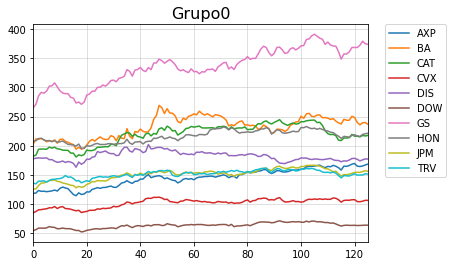

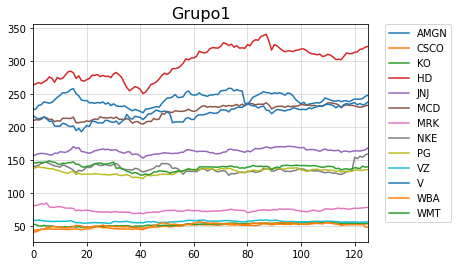

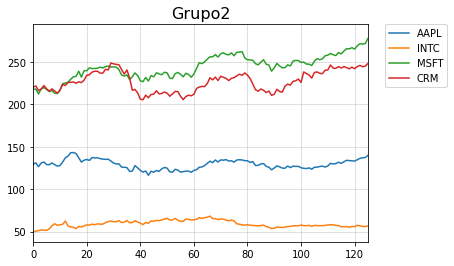

In [260]:
for grupo in grupos.keys():
  for simbolo in grupos[grupo]:
    plt.plot(datos.index,datos[simbolo],label=simbolo)
  plt.title(grupo,fontsize=16)
  plt.xlim(0,125)
  plt.grid(alpha=0.5)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

* **Testiando algortimo k-means** 

Se importan datos para probar el agoritmo

In [297]:
web2="https://es.wikipedia.org/wiki/NASDAQ-100"
web_symbols2=rq.get(web2)
web_symbols_sopa2=BeautifulSoup(web_symbols2.text,"lxml")

In [298]:
simbolos2=[]
for i in web_symbols_sopa2.find("table",attrs={"class":"wikitable sortable"}).find_all("td"):
  simbolos2.append(i.text)
simbolos2=[i for i in simbolos2 if len(i)<5]
lista_remove=["NTES","NFLX",'NVDA','NXPI','ORLY','PCAR','PAYX','PYPL','PEP','QCOM','REGN','ROST','SIRI','SWKS','SBUX','SYMC',\
 'SNPS','TTWO','TSLA','TXN','KHC','TMUS','ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WLTW','WDAY','WYNN','XEL','XLNX',\
 "CELG","EBAY","MYL","CTRP","AMZN","BKNG","MELI","CHTR"]
for i in lista_remove:
  simbolos2.remove(i)

In [299]:
import finnhub
import numpy as np
import pandas as pd 
import datetime
finnhub_client = finnhub.Client(api_key="c3d1rviad3i868doota0") #Api key

datos_2=pd.DataFrame()    
fecha_inicio=" 1609477200" # 1 enero 2021     #"1622527200"    #  
fecha_final=" 1626238800"   #14 de julio 2021

periodo="D"    #['M','5M','15M','30M','H','D','W','M']
datos_2[f"Fecha"]=(finnhub_client.stock_candles(simbolos2[0], periodo, int(fecha_inicio),int(fecha_final) ))["t"] #"t"
for i in simbolos2:
  datos_2[f"{i}"]=(finnhub_client.stock_candles(i, periodo, int(fecha_inicio),int(fecha_final)))["c"]


In [300]:
# Transformacion de los formatos de Fecha 
datos_2.insert(0,"Fecha_",[datetime.datetime.fromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S') for i in datos_2["Fecha"]])  
datos_2.drop(columns=["Fecha"],inplace=True)
datos_2.insert(0,"Fecha",["/".join(reversed(i.split(" ")[0].split("-"))) for i in datos_2["Fecha_"] ])
datos_2.drop(columns=["Fecha_"],inplace=True)


In [301]:
datos_2.head()

,Fecha,ATVI,ADBE,AMD,ALXN,ALGN,AAL,AMGN,ADI,AAPL,AMAT,ASML,ADSK,ADP,BIDU,BIIB,BMRN,AVGO,CDNS,CERN,CHKP,CTAS,CSCO,CTXS,CTSH,COST,CSX,DLTR,eBay,EA,EXPE,FB,FAST,FISV,GILD,HAS,HSIC,IDXX,ILMN,INCY,INTC,INTU,ISRG,JBHT,JD,KLAC,LRCX,LULU,MAR,MXIM,MCHP,MU,MSFT,MDLZ,MNST,NTAP
0,04/01/2021,89.90,485.34,92.30,156.81,526.46,15.13,226.66,146.02,129.41,86.87,500.00,296.84,168.96,216.80,242.95,86.30,425.22,135.76,77.74,129.88,343.60,43.96,128.33,79.42,380.15,29.330000,106.94,51.50,139.51,131.37,268.94,47.65,111.92,60.11,91.96,66.49,491.77,367.76,86.45,49.67,371.70,800.00,134.84,86.33,260.33,478.02,356.40,124.77,87.50,137.18,74.05,217.69,57.92,90.60,64.86
1,05/01/2021,90.69,485.69,92.77,157.36,543.65,15.43,227.76,148.63,131.01,89.60,505.36,301.70,168.49,214.00,246.39,85.90,428.10,136.14,78.21,128.74,348.89,43.98,127.63,79.65,375.74,29.826667,107.13,52.03,141.32,137.14,270.97,48.28,112.36,60.00,93.18,67.78,497.26,374.90,85.87,50.61,368.87,805.05,138.07,95.50,265.79,494.55,366.50,126.09,89.33,140.19,77.26,217.90,57.98,91.42,65.17
2,06/01/2021,88.00,466.31,90.33,157.76,540.39,15.52,233.25,149.30,126.60,90.83,490.22,302.87,167.90,203.97,247.75,87.74,425.46,130.64,78.83,126.42,350.99,44.40,125.77,80.15,370.02,30.620000,112.97,53.22,136.80,143.42,263.31,49.10,114.18,61.95,94.49,69.56,483.60,376.55,84.31,51.10,361.00,792.79,147.29,88.18,265.21,496.49,363.25,129.39,89.72,142.88,77.11,212.25,57.87,90.70,65.23
3,07/01/2021,89.67,477.74,95.16,155.75,558.36,15.38,234.02,155.61,130.92,94.56,501.43,315.20,168.85,207.89,250.44,90.69,443.39,137.05,79.63,127.06,355.06,44.96,128.44,80.95,367.92,31.343333,114.75,53.06,140.74,142.29,268.74,49.71,114.43,62.52,94.79,70.01,495.19,382.41,90.05,52.19,368.63,808.21,148.47,87.92,278.19,514.46,367.29,130.35,93.92,148.70,79.11,218.29,57.76,93.50,65.24
4,08/01/2021,91.30,485.10,94.58,157.35,570.53,15.13,238.49,156.74,132.05,95.56,508.74,319.85,171.05,240.25,252.54,89.86,445.64,136.19,79.86,131.96,350.15,45.06,130.85,81.95,369.94,31.946667,112.97,54.48,141.86,144.02,267.57,50.75,116.79,63.04,97.26,72.10,513.20,379.61,93.83,51.65,374.46,818.75,149.35,91.54,283.18,501.63,365.46,129.69,94.41,147.40,77.42,219.62,58.19,94.99,64.97


In [302]:
datos_crecimiento_2=pd.DataFrame()
for columna in list(datos_2.columns):
  if columna=="Fecha":
    None
  else:
    for i in range(len(datos_2)):
      crecimiento(datos_2,columna)
      datos_crecimiento_2[columna]=lista_resultado
datos_crecimiento_2.insert(0,"Fecha",datos["Fecha"])

In [303]:
datos_crecimiento_2.head()

,Fecha,ATVI,ADBE,AMD,ALXN,ALGN,AAL,AMGN,ADI,AAPL,AMAT,ASML,ADSK,ADP,BIDU,BIIB,BMRN,AVGO,CDNS,CERN,CHKP,CTAS,CSCO,CTXS,CTSH,COST,CSX,DLTR,eBay,EA,EXPE,FB,FAST,FISV,GILD,HAS,HSIC,IDXX,ILMN,INCY,INTC,INTU,ISRG,JBHT,JD,KLAC,LRCX,LULU,MAR,MXIM,MCHP,MU,MSFT,MDLZ,MNST,NTAP
0,04/01/2021,0.008788,0.000721,0.005092,0.003507,0.032652,0.019828,0.004853,0.017874,0.012364,0.031426,0.010720,0.016372,-0.002782,-0.012915,0.014159,-0.004635,0.006773,0.002799,0.006046,-0.008777,0.015396,0.000455,-0.005455,0.002896,-0.011601,0.016934,0.001777,0.010291,0.012974,0.043922,0.007548,0.013221,0.003931,-0.001830,0.013267,0.019401,0.011164,0.019415,-0.006709,0.018925,-0.007614,0.006312,0.023954,0.106220,0.020973,0.034580,0.028339,0.010579,0.020914,0.021942,0.043349,0.000965,0.001036,0.009051,0.004780
1,05/01/2021,-0.029661,-0.039902,-0.026302,0.002542,-0.005997,0.005833,0.024104,0.004508,-0.033662,0.013728,-0.029959,0.003878,-0.003502,-0.046869,0.005520,0.021420,-0.006167,-0.040400,0.007927,-0.018021,0.006019,0.009550,-0.014573,0.006277,-0.015223,0.026598,0.054513,0.022871,-0.031984,0.045793,-0.028269,0.016984,0.016198,0.032500,0.014059,0.026261,-0.027471,0.004401,-0.018167,0.009682,-0.021335,-0.015229,0.066778,-0.076649,-0.002182,0.003923,-0.008868,0.026172,0.004366,0.019188,-0.001941,-0.025929,-0.001897,-0.007876,0.000921
2,06/01/2021,0.018977,0.024512,0.053471,-0.012741,0.033254,-0.009021,0.003301,0.042264,0.034123,0.041066,0.022867,0.040711,0.005658,0.019219,0.010858,0.033622,0.042143,0.049066,0.010148,0.005062,0.011596,0.012613,0.021229,0.009981,-0.005675,0.023623,0.015756,-0.003006,0.028801,-0.007879,0.020622,0.012424,0.002190,0.009201,0.003175,0.006469,0.023966,0.015562,0.068082,0.021331,0.021136,0.019450,0.008011,-0.002949,0.048942,0.036194,0.011122,0.007419,0.046812,0.040733,0.025937,0.028457,-0.001901,0.030871,0.000153
3,07/01/2021,0.018178,0.015406,-0.006095,0.010273,0.021796,-0.016255,0.019101,0.007262,0.008631,0.010575,0.014578,0.014753,0.013029,0.155659,0.008385,-0.009152,0.005075,-0.006275,0.002888,0.038564,-0.013829,0.002224,0.018764,0.012353,0.005490,0.019249,-0.015512,0.026762,0.007958,0.012158,-0.004354,0.020921,0.020624,0.008317,0.026058,0.029853,0.036370,-0.007322,0.041977,-0.010347,0.015815,0.013041,0.005927,0.041174,0.017937,-0.024939,-0.004982,-0.005063,0.005217,-0.008742,-0.021363,0.006093,0.007445,0.015936,-0.004139
4,08/01/2021,-0.004272,-0.022387,0.028230,-0.005402,-0.023645,-0.008592,-0.003858,0.009953,-0.023249,0.025115,-0.001553,-0.006378,-0.014849,-0.086160,0.059317,-0.095927,0.000269,-0.011014,-0.012271,0.014777,-0.030416,0.006658,-0.009171,-0.022087,-0.016030,0.001565,-0.004780,-0.010095,-0.004511,-0.007360,-0.040102,-0.005320,-0.014899,-0.008407,-0.004216,0.003883,-0.012958,-0.018782,-0.005435,-0.002130,-0.005661,-0.006229,-0.008102,-0.012672,0.020941,0.029603,-0.010398,-0.007942,0.010274,0.002782,0.016146,-0.009699,-0.018904,-0.021581,0.003848


In [304]:
data_predict=datos_crecimiento_2.transpose()

In [305]:
data_predict.drop("Fecha",axis=0,inplace=True)
data_predict.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131
ATVI,0.00878754,-0.0296615,0.0189773,0.0181778,-0.00427163,-0.0182598,0.00582633,0.00245071,0.00777864,0.0271254,0.0211487,-0.00546678,-0.00179704,-0.0109076,-0.0109208,-0.0401602,0.0180444,0.00808685,0.00461538,0.0280026,-0.0128751,-0.000970141,0.096353,-0.00413345,0.0152189,0.000292028,0.00467108,0.00552112,-0.00818804,-0.00592463,-0.00097704,-0.0141809,-0.0418651,-0.00165666,-0.00757104,-0.00616574,0.00536278,0.032528,-0.0199554,-0.0314212,...,0.0147346,0.00640615,0.0245067,-0.0124262,0.0118486,0.000725389,0.00755928,-0.000513875,0,-0.00822622,-0.0109902,-0.00429814,0.0195831,0.00289137,-0.00329489,-0.00278926,0.012017,0.00470877,0.0104941,-0.0323654,-0.0199021,-0.00924942,-0.0182423,0.00360695,0.000653452,-0.0118633,0.0189448,-0.00270241,0.0340343,0.00220126,-0.00177806,-0.0161358,0.00394036,0.00137902,-0.0115466,-0.0121102,0.00216967,0.00573717,0.00365946,-0.00997319
ADBE,0.000721144,-0.039902,0.0245116,0.0154059,-0.0223871,-0.00546137,0.000848087,-0.0185997,-0.011203,-0.00344918,0.0289814,0.00487514,0.000889793,0.00211667,0.00599865,-0.0341816,0.0123261,-0.0148174,0.0244785,0.031766,-0.00620708,0.0154797,0.00559892,0.00333252,0.00463788,-0.00681383,0.00801754,0.00447022,0.00561302,-0.0207519,-0.00582212,-0.0189406,-0.0246076,0.00100571,0.0188542,-0.036633,0.00111072,0.0215372,-0.00634623,-0.0388778,...,-0.0043916,-0.000312097,0.0233105,-0.00732198,0.0199971,0.0145632,0.00376178,-0.0171604,0.0126435,-0.0171826,-0.000282309,-0.00530488,0.0230361,0.00985134,-0.000529963,0.010762,0.0404912,0.0107186,0.0289879,-0.0152437,-0.00935346,0.0147792,0.0258089,0.00311179,0.014788,-0.00262271,0.00701809,0.00242106,0.0157679,0.00331182,-0.00865002,-0.00155386,0.014263,0.00645792,0.0148601,0.000297142,-0.00239294,-0.00711332,0.008014,0.00631395
AMD,0.00509209,-0.0263016,0.0534706,-0.006095,0.0282301,-0.0194859,-0.0374915,-0.0107867,-0.0284172,0.0140574,-0.0078256,0.0313239,0.013766,0.0144412,0.00616169,-0.0619787,-0.0148582,-0.0214808,0.0235871,0.0136893,-0.010916,-0.000568893,0.00068306,0.0406143,-0.00612223,0.0158398,0.00335679,0.0119793,-0.0246347,-0.0166193,-0.0144541,0.0106047,-0.0469971,-0.00737964,0.0259618,-0.0519899,0.0253579,0.0222459,-0.0261604,-0.0388684,...,-0.00281313,0.0240462,0.0240063,-0.0114015,0.00349877,0.00542355,0.00616491,0.00102119,0.0211681,0.00911588,0.0143547,-0.0206173,0.0161933,-0.00281932,-0.00565458,-0.0114971,0.02001,-0.00306523,0.00295167,-0.0132434,-0.00447372,0.0555486,0.00106433,-0.0243355,0.0119869,0.0028715,0.0272011,-0.00557491,0.0170521,0.0280202,0.0492627,-0.00660066,0.0148966,-0.00242872,-0.0416005,-0.00883587,0.0129262,-0.000990099,-0.0060566,-0.0134057
ALXN,0.00350743,0.00254194,-0.0127409,0.0102729,-0.00540197,-0.0058147,0.00546308,0.00134237,0.000319183,0.0128271,-0.00611178,0.000760746,0.0118459,0.0099543,0.00266551,-0.0374652,0.0102768,-0.0251764,0.0154569,-0.00539499,-0.000774893,0.00549309,-0.0107333,0.00376819,0.00498382,-0.00444387,6.46914e-05,0.0245812,-0.010733,0.00210607,0.00356642,-0.0131362,-0.00450132,-0.0121439,0.0102007,-0.00543725,-0.00585747,-0.00510638,-0.0105284,-0.0144976,...,0.000686695,0.00343112,0.0164701,-0.00358825,0.00180059,-0.00527971,-0.00564653,0.00528109,-0.0027114,-0.00390824,-0.00199022,0.00153837,0.00762317,-0.00474255,0.00187202,0.0145518,0.0156826,-0.00186823,0,0.00137627,-0.00742166,-0.00321241,0.00400067,-0.00016603,-0.00570132,0.0011134,0.00494912,0.0111775,0.00766116,0.000868904,-0.0032013,0.00756627,0.00637493,-0.00934078,-0.0014631,-0.00472133,0.00436205,0.00928339,0.000376526,0.00338746
ALGN,0.0326521,-0.00599651,0.0332538,0.021796,-0.0236447,-0.00746805,-0.00314716,0.00635047,0.0226994,-0.0173122,0.0124863,-0.03643,-0.0178923,0.0100921,-0.00810054,-0.0475799,0.0528608,-0.0208729,0.033632

In [306]:
labels_predict=kmeans.predict(data_predict)
labels_predict

array([2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0], dtype=int32)

In [307]:
data_labels_predict=pd.DataFrame(list(data_predict.index),list(labels_predict))
data_labels_predict.reset_index(inplace=True)
data_labels_predict.columns=["Grupo","Simbolo"]
data_labels_predict.head()
#data_labels_predict

,Grupo,Simbolo
0,2,ATVI
1,2,ADBE
2,2,AMD
3,1,ALXN
4,2,ALGN


* Se pueden observar los grupos que formo el algoritmo, y asi mismo comparar el comportamiento de estos individuos en graficos

In [308]:
grupos_predict={}
for i in range(3):
  a=list(data_labels_predict.loc[data_labels_predict["Grupo"]==i]["Simbolo"])
  grupos_predict[f"Grupo{i}"]=a
for i in grupos_predict.keys():
  print(f"{i}:{grupos_predict[i]} {len(grupos_predict[i])}")
  print(" ")

Grupo0:['AAL', 'CSX', 'EXPE', 'HSIC', 'JBHT', 'MAR', 'NTAP'] 7
 
Grupo1:['ALXN', 'AMGN', 'ADP', 'BIIB', 'BMRN', 'CERN', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'COST', 'DLTR', 'eBay', 'FAST', 'FISV', 'GILD', 'HAS', 'INCY', 'MDLZ', 'MNST'] 21
 
Grupo2:['ATVI', 'ADBE', 'AMD', 'ALGN', 'ADI', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'BIDU', 'AVGO', 'CDNS', 'EA', 'FB', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'LRCX', 'LULU', 'MXIM', 'MCHP', 'MU', 'MSFT'] 27
 


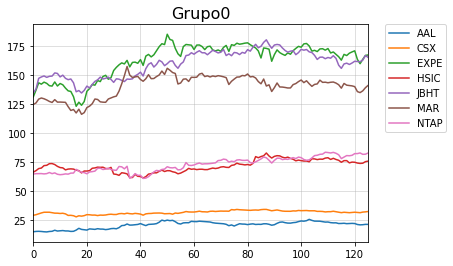

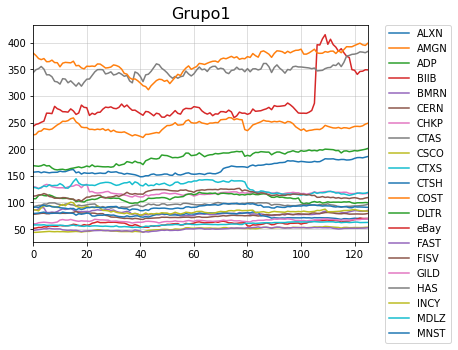

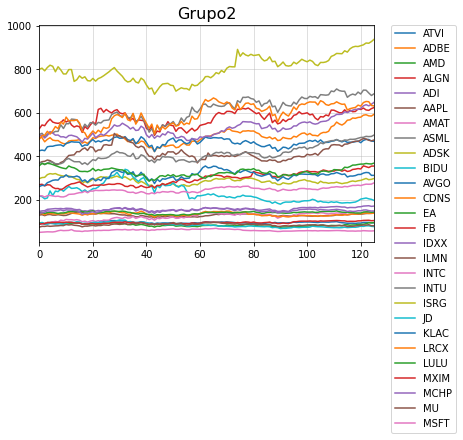

In [309]:
for grupo in grupos_predict.keys():
  for simbolo in grupos_predict[grupo]:
    plt.plot(datos_2.index,datos_2[simbolo],label=simbolo)
  plt.title(grupo,fontsize=16)
  plt.xlim(0,125)
  plt.grid(alpha=0.5)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()